In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [52]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_Sale_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

Housing Inventory: How has the housing inventory fluctuated since pre-pandemic times?

In [53]:
region_df = for_sale_inventory_df.rename(columns={"2018-03-31":"March 2018","2018-09-30":"September 2018",
                                                "2019-03-31":"March 2019","2019-09-30":"September 2019",
                                                "2020-03-31":"March 2020","2020-09-30":"September 2020",
                                                "2021-03-31":"March 2021","2021-09-30":"September 2021",
                                                "2022-03-31":"March 2022","2022-09-30":"September 2022",
                                                "2023-03-31":"March 2023","2023-06-30":"June 2023",})
housing_inventory = region_df[["RegionID","RegionName","RegionType","StateName",
                                           "March 2018","September 2018","March 2019","September 2019","March 2020","September 2020","March 2021",
                                           "September 2021","March 2022","September 2022","March 2023","June 2023"]].copy()
housing_inventory   

# The following code will make a new DataFrame using ALL the dates, not specific months
complete_housing_inventory = for_sale_inventory_df.iloc[[1,2,3,29,58]]
complete_housing_inventory

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,60262.0,58241.0,55450.0,50400.0,45916.0,42796.0,43253.0,44197.0,45829.0,46180.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,22400.0,21802.0,20477.0,18604.0,16767.0,15382.0,15214.0,15103.0,15283.0,15364.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48984.0,...,31682.0,30798.0,28771.0,25674.0,22770.0,20829.0,20922.0,21214.0,22091.0,22700.0
29,394355,29,"Austin, TX",msa,TX,7392.0,8277.0,9243.0,9920.0,10287.0,...,12616.0,12433.0,11764.0,10703.0,9743.0,9093.0,9350.0,10007.0,11016.0,11759.0
58,394938,59,"Omaha, NE",msa,NE,3001.0,3167.0,3419.0,3638.0,3834.0,...,2242.0,2146.0,1980.0,1752.0,1543.0,1386.0,1446.0,1567.0,1748.0,1889.0


[73707.0, 80345.0, 85864.0, 90067.0, 91881.0, 91252.0, 90050.0, 89340.0, 87186.0, 81944.0, 76678.0, 74497.0, 78192.0, 84211.0, 91255.0, 95966.0, 97260.0, 95383.0, 93359.0, 91309.0, 87828.0, 80727.0, 74301.0, 72005.0, 74371.0, 72270.0, 70474.0, 70352.0, 77012.0, 81547.0, 82809.0, 80976.0, 77001.0, 70532.0, 65541.0, 61868.0, 61966.0, 62738.0, 65965.0, 68986.0, 70650.0, 70786.0, 69101.0, 67467.0, 63984.0, 57820.0, 50768.0, 46430.0, 48039.0, 51340.0, 55710.0, 58872.0, 61312.0, 61386.0, 60262.0, 58241.0, 55450.0, 50400.0, 45916.0, 42796.0, 43253.0, 44197.0, 45829.0, 46180.0]


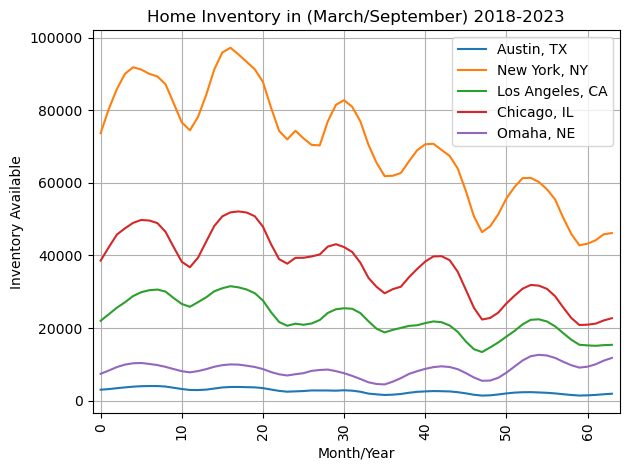

In [64]:
# Create a variable for each city we are analyzing for this project
homes_in_austin_tx = complete_housing_inventory.loc[housing_inventory["RegionName"] == "Austin, TX"]
homes_in_omaha_ne = complete_housing_inventory.loc[housing_inventory["RegionName"] == "Omaha, NE"]
homes_in_chicago_il = complete_housing_inventory.loc[housing_inventory["RegionName"] == "Chicago, IL"]
homes_in_ny_ny = complete_housing_inventory.loc[housing_inventory["RegionName"] == "New York, NY"]
homes_in_la_ca = complete_housing_inventory.loc[housing_inventory["RegionName"] == "Los Angeles, CA"]

# Make a DataFrame using the loc function to find specific cities 
inventory_comparison = housing_inventory.loc[(housing_inventory["RegionName"] == "Austin, TX") |
                                             (housing_inventory["RegionName"] == "Omaha, NE") |
                                             (housing_inventory["RegionName"] == "Chicago, IL") |
                                             (housing_inventory["RegionName"] == "New York, NY") |
                                             (housing_inventory["RegionName"] == "Los Angeles, CA")
                                            ]

# Reset index to match the city and state we are analyzing 
inventory_comparison = inventory_comparison.set_index("RegionName")

# Find the row where each city is located 
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Omaha, NE"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "New York, NY"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Chicago, IL"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Los Angeles, CA"]
complete_housing_inventory.loc[complete_housing_inventory["RegionName"] == "Austin, TX"]

# Find the inventory over the five-year period for each city 
ny_ny_inventory = complete_housing_inventory.iloc[0,5:].to_list()
om_ne_inventory = complete_housing_inventory.iloc[3,5:].to_list()
ch_il_inventory = complete_housing_inventory.iloc[2,5:].to_list()
los_ca_inventory = complete_housing_inventory.iloc[1,5:].to_list()
au_tx_inventory = complete_housing_inventory.iloc[4,5:].to_list()

print(ny_ny_inventory)

# Create a DataFrame that displays the housing inventory over a 5-year period for the five cities in the US
df = pd.DataFrame({
    "Austin, TX": au_tx_inventory,
    "New York, NY": ny_ny_inventory,
    "Los Angeles, CA": los_ca_inventory,
    "Chicago, IL": ch_il_inventory,
    "Omaha, NE": om_ne_inventory
})

line = df.plot.line()

# Set a Title and labels
plt.title("Home Inventory in (March/September) 2018-2023")
plt.xlabel("Month/Year")
plt.ylabel("Inventory Available")
plt.xlim(-1,64)
plt.xticks(rotation=90)
plt.grid(True)

# Save our graph and show the graph
plt.tight_layout()
plt.savefig("Output/Pandemic-Home-Inventory.png")
plt.show()


How has the Pandemic impacted Home Sale Prices from 2018-2023 and how have home prices changed since the beginning of the pandemic? Which city/cities saw the greatest rate of increase in price? 

In [ ]:
def calculate_rate_of_increase(prices):
    return (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100



In [ ]:
city_groups = df.groupby('RegionName')['Price'].apply(calculate_rate_of_increase)

List vs. Sold Listing prices that are currently available in the US?

In [ ]:
Where are the most affordable places to live in the United States in 2023 based on median price?